In [1]:
# Ejemplo "dígitos": Demostrar el uso de TensorFlow para crear y entrenar una red neuronal
#   que pueda reconoder los dígitos escritos de mano. 
# El Dataset contiene 70,000 imágenes de dígitos escritos a mano con las características:
#   - Tamaño: 28x28 pixels  - Tipo: Escala de grises ( un solo canal )
#   - Valores: entre 0 ( blanco ) y 255 ( negro )

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 994.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 7.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 21.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 20.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.0 MB/s 

In [3]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt

2024-09-24 23:33:34.791472: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 23:33:34.796228: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 23:33:34.812540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 23:33:34.838750: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 23:33:34.846308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 23:33:34.864569: I tensorflow/core/platform/cpu_feature_gu

In [5]:
# Paso 1: Carga de datos
print("Cargando el dataset MNIST...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Cargando el dataset MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# Normalización de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"Forma de los datos de entrenamiento: {train_images.shape}")
print(f"Forma de los datos de prueba: {test_images.shape}")

Forma de los datos de entrenamiento: (60000, 28, 28)
Forma de los datos de prueba: (10000, 28, 28)


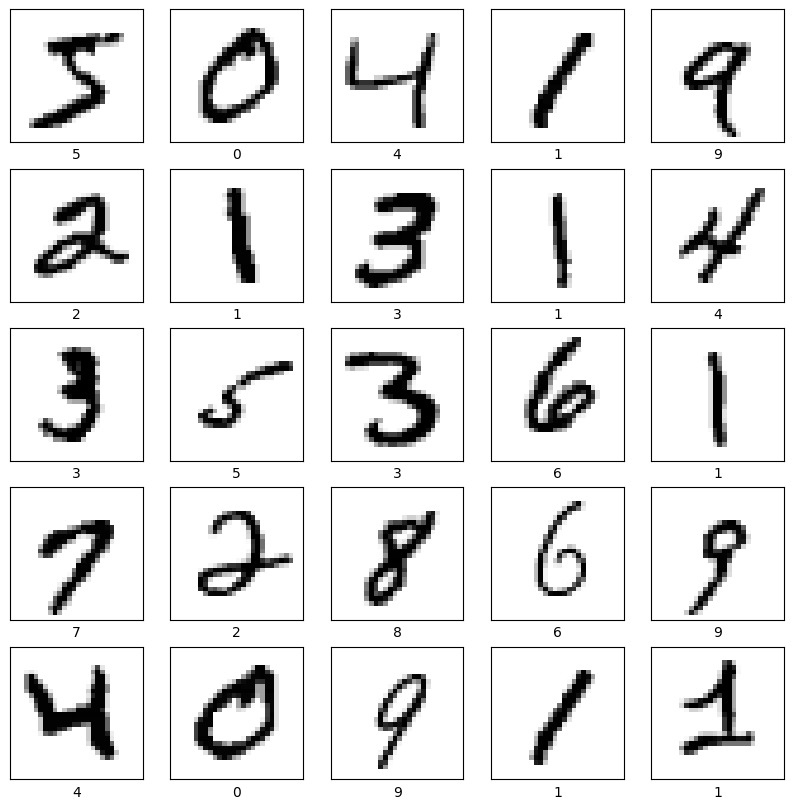

In [7]:
# Paso 2: Visualización de algunos ejemplos
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [8]:
# Paso 3: Construcción del modelo
print("Construyendo el modelo...")
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanamos la imagen 28x28 a un vector de 784
    layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    layers.Dropout(0.2),                   # Dropout para reducir el overfitting
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por dígito)
])

Construyendo el modelo...


/home/gera/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Paso 4: Entrenamiento del modelo
print("Entrenando el modelo...")
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_split=0.1, verbose=1)

Entrenando el modelo...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8508 - loss: 0.5078 - val_accuracy: 0.9672 - val_loss: 0.1257
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9503 - loss: 0.1656 - val_accuracy: 0.9728 - val_loss: 0.0929
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1150 - val_accuracy: 0.9752 - val_loss: 0.0831
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9707 - loss: 0.0917 - val_accuracy: 0.9797 - val_loss: 0.0741
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9768 - loss: 0.0749 - val_accuracy: 0.9793 - val_loss: 0.0753


In [11]:
# Paso 5: Evaluación del modelo
print("Evaluando el modelo...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

Evaluando el modelo...
313/313 - 0s - 765us/step - accuracy: 0.9765 - loss: 0.0796

Precisión en el conjunto de prueba: 0.9765


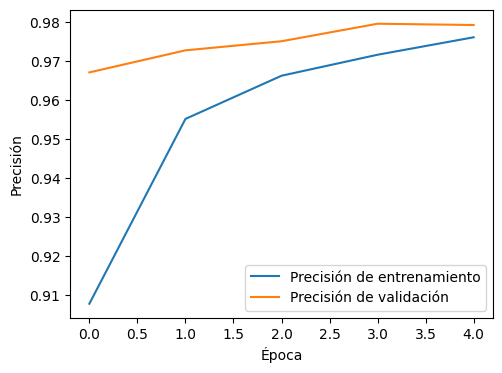

In [12]:
# Paso 6: Visualización del proceso de entrenamiento
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

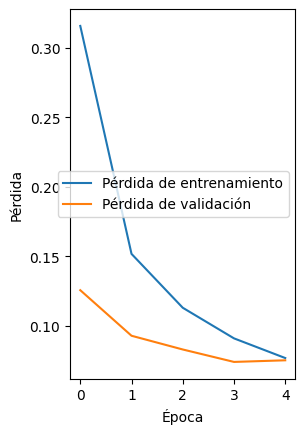

In [13]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step


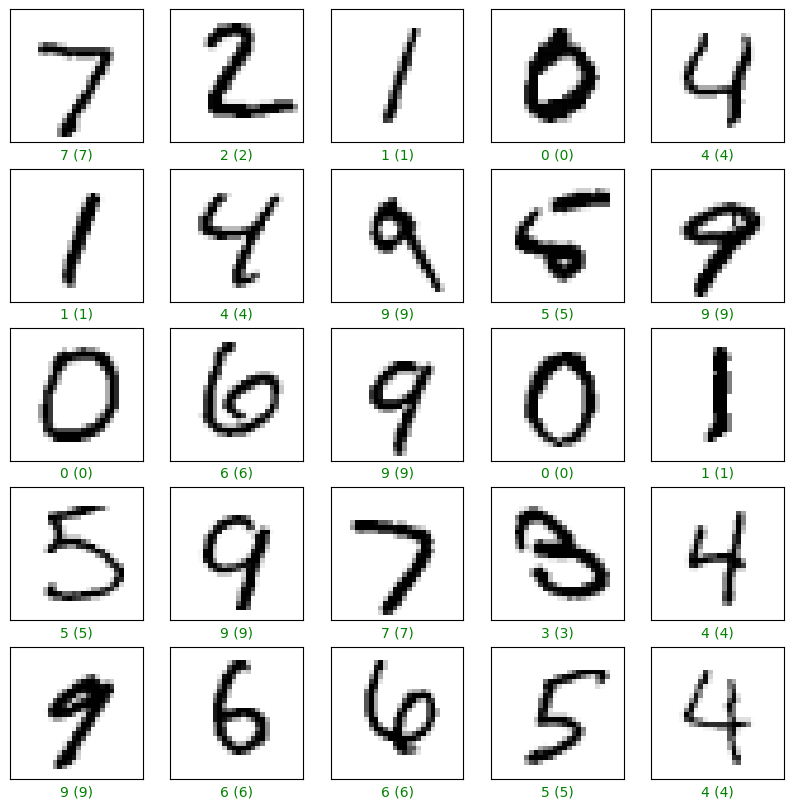

Proceso completado.


In [16]:
# Paso 7: Predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Visualización de algunas predicciones
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

print("Proceso completado.")